## Simple Euler solvers - explicit (forward) and implicit

Trying to do it in the most simplified way: f is the _ODE_ that is passed as a parameter to the solver functions, x is a _vector_, and the other parameter is the time step

In [2]:
function eulerfwd(y, Δt, f)
    y = y + f(y)*Δt
    return y
end

eulerfwd (generic function with 1 method)

In [3]:
function eulerbkwd(y, Δt, f)
    y = y + f(eulerfwd(y,Δt,f))*Δt
    return y
end

eulerbkwd (generic function with 1 method)

Now, let's define f for SHO, the imple harmonic oscillator:

$\vec y = [x \ v]^T \\
\\
x' = v \\
v' = g - \dfrac{k}{m}x - \dfrac{\beta}{m}v$

In [17]:
# Example - the simplest SHO
# Using 2x2 matrix to define the system dynamics - linear ODEs

function f(y) # y is a vector: [x;v]; no friction - beta=0
    return [0 1;-1 0]*y
end

f (generic function with 1 method)

In [5]:
eulerfwd([1;0],0.1,f)

2-element Array{Float64,1}:
  1.0
 -0.1

In [6]:
eulerbkwd([1;0],0.1,f)

2-element Array{Float64,1}:
  0.99
 -0.1 

Harmonic oscillator ODE with k = 2, m = 0.5, and β = 0

In [7]:
function f(y) # y is a vector: [x;v]; no friction - beta=0
    return [0 1;-4 0]*y
end

eulerfwd([-1; -2], 0.1, f)

2-element Array{Float64,1}:
 -1.2
 -1.6

In [8]:
Δt = 0.1
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulerfwd(y,Δt,f)
    println(t," ",y[1]," ",y[2])
end

y


0.1 -1.2 -1.6
0.2 -1.3599999999999999 -1.12
0.3 -1.472 -0.5760000000000002
0.4 -1.5296 0.012799999999999812
0.5 -1.5283200000000001 0.6246399999999999


2-element Array{Float64,1}:
 -1.5283200000000001
  0.6246399999999999

In [9]:
using Plots; using GR
gr()

Plots.GRBackend()

In [10]:
function plot_odesolution(y0 = [-1;-2], Δt = 0.1 , n = 200, func = f, solver = eulerfwd)
    xvec = []
    yvec = []
    y = y0
    append!(xvec,y0[1])
    append!(yvec,y0[2])
    for i in 1:n
        y = solver(y,Δt,func)
        append!(xvec,y[1])
        append!(yvec,y[2])
    end
    Plots.plot(xvec,yvec,seriestype=:scatter,title="ODE Solution",marker=(:none,1),legend=nothing,fmt=:png)
end

plot_odesolution (generic function with 6 methods)

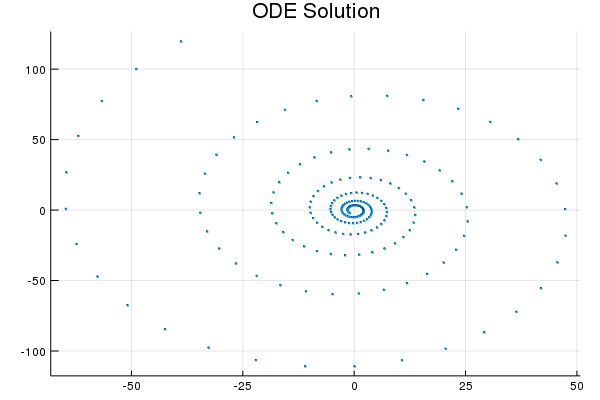

In [11]:
plot_odesolution([-1;-2],0.1,200,f)

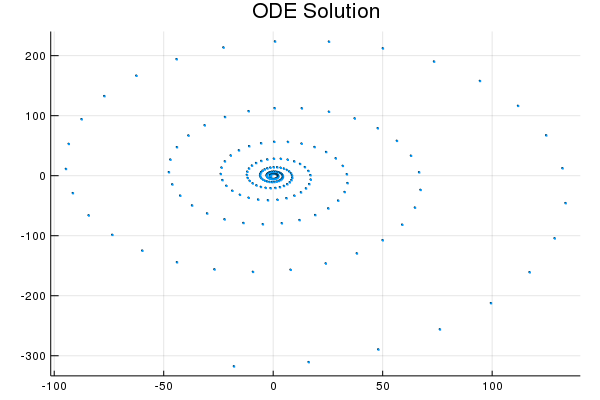

In [12]:
plot_odesolution([-1;-2],0.11,200,f)

In [13]:
Δt = 0.1
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulerbkwd(y,Δt,f)
    println(t," ",y[1]," ",y[2])
end

y

0.1 -1.1600000000000001 -1.52
0.2 -1.2656 -0.9951999999999999
0.3 -1.314496 -0.4491519999999998
0.4 -1.30683136 0.09461248000000022
0.5 -1.2450968576 0.6135605248000002


2-element Array{Float64,1}:
 -1.2450968576      
  0.6135605248000002

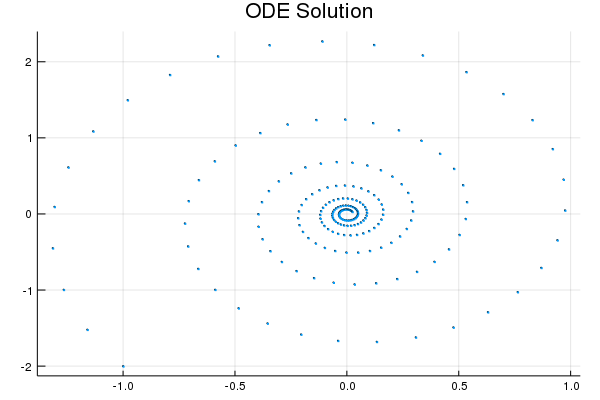

In [14]:
plot_odesolution([-1;-2],0.1,200,f,eulerbkwd)

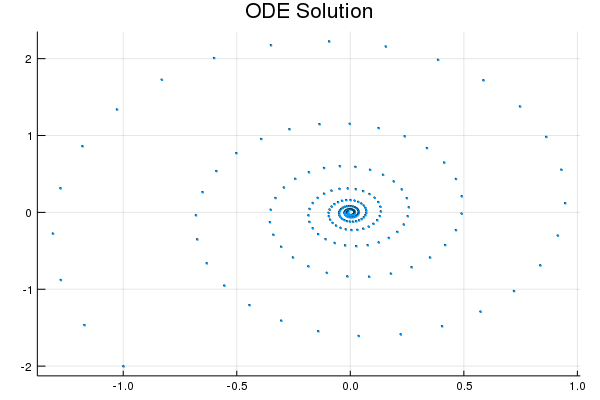

In [15]:
plot_odesolution([-1;-2],0.11,200,f,eulerbkwd)

Solving SHO equations with k=2, m=1, and $\beta$=0, from the initial condition x(t=0)=-1 , v(t=0)=-2, with a timestep of 0.05, to compute the values of x and v at t=0.5. 

In [16]:
function f(y) # y is a vector [x;v]; no friction - beta=0
    return [0 1;-2 0]*y
end

Δt = 0.05
t0 = 0
y0 = [-1; -2]

y = y0 # set the initial condition for the loop

for t in Δt:Δt:0.5
    y = eulerfwd(y,Δt,f)
    # println(t," ",y[1]," ",y[2])
end

y

2-element Array{Float64,1}:
 -1.7208522787468752
 -0.6198190556187498